## Density Ratio Trick

Technika określająca podobnieństwo pomiędzy dwoma dystrybucjami a dokładniej ich ilorazem. Używana
przy wyliczaniu Dywergencji Kullbacka-Leiblera będącą miarą podobieństwa dwóch rozkładów.


W prostym i akademickim przypadku mamy do dyspozycji dwie funkcje gęstości prawdopodobonieństwa opisane
równaniami. Policzenie ich ilorazu nie jest problemem.

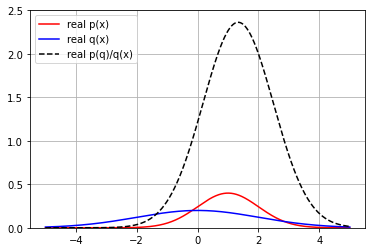

In [233]:
import torch
import matplotlib.pyplot as plt

from torch.distributions import normal

def log_density_ratio(p, q):
    def log_ratio(point):
        return p.log_prob(point) - q.log_prob(point)

    return log_ratio

def density_ratio(p, q):
    log_ratio = log_density_ratio(p, q)

    def ratio(point):
        return torch.exp(log_ratio(point))

    return ratio

def get_distribution_values(p, xp):
    values = torch.exp(p.log_prob(xp))
    values = torch.div(values, torch.sum(values))

    return values

mu1, std1 = torch.tensor(1.0), torch.tensor(1.0)
mu2, std2 = torch.tensor(0.0), torch.tensor(2.0)
p_real = normal.Normal(mu1, std1)
q_real = normal.Normal(mu2, std2)
x = torch.linspace(-5, 5, 10000)

ratio = density_ratio(p_real, q_real)(x)

plt.figure()
plt.plot(x, torch.exp(p_real.log_prob(x)), c='r', label='real p(x)')
plt.plot(x, torch.exp(q_real.log_prob(x)), c='b', label='real q(x)')
plt.plot(x, ratio, c='k', linestyle='--', label='real p(q)/q(x)')
plt.legend()
plt.grid()
plt.ylim(0, 2.5)
plt.xlim(-5.5, 5.5)
plt.show()

In [247]:
from torch.distributions import kl_divergence

mc_no_samples = 50000
xp_mc_samples = p_real.sample((mc_no_samples,))

p_values = get_distribution_values(p_real, x)
q_values = get_distribution_values(q_real, x)
plot_div = torch.dot(p_values, torch.log(torch.div(p_values, q_values)))
real_div = kl_divergence(p_real, q_real)
gauss_div = torch.log(std2) - torch.log(std1) - (1 / 2 * (1 - (((std1**2)+((mu1-mu2)**2)) / std2 ** 2)))
monte_carlo = torch.mean(torch.log(torch.exp(p_real.log_prob(xp_mc_samples))/torch.exp(q_real.log_prob(xp_mc_samples))))

print(f"pytorch kl-divergence ({real_div:.6f})")
print(f"gaussians' based analytical kl-divergence ({gauss_div:.6f})")
print(f"plot divergence based on integral calculation: ({plot_div:.6f})")
print(f"monte carlo kl divergence estimation: ({monte_carlo:.6f})")

pytorch divergence (0.443147)
gaussians' divergence (0.443147)
plot divergence: (0.430858)
monte carlo: (0.444290)
